In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf

# CNN metadata:

In [2]:
cle = pd.read_csv('cle_metadata_cnn.csv')
vir = pd.read_csv('vir_metadata_cnn.csv')
hun = pd.read_csv('hun_metadata_cnn.csv')
swi = pd.read_csv('swi_metadata_cnn.csv')

In [3]:
cle_train,cle_test = train_test_split(cle,test_size=0.33, random_state=42)
vir_train,vir_test = train_test_split(vir,test_size=0.33, random_state=42)
hun_train,hun_test = train_test_split(hun,test_size=0.33, random_state=42)
swi_train,swi_test = train_test_split(swi,test_size=0.33, random_state=42)

In [4]:
cle_train.to_csv('cle_metadata_cnn_train.csv',index = False)
cle_test.to_csv('cle_metadata_cnn_test.csv',index = False)

In [5]:
vir_train.to_csv('vir_metadata_cnn_train.csv',index = False)
vir_test.to_csv('vir_metadata_cnn_test.csv',index = False)

In [6]:
hun_train.to_csv('hun_metadata_cnn_train.csv',index = False)
hun_test.to_csv('hun_metadata_cnn_test.csv',index = False)

In [7]:
swi_train.to_csv('swi_metadata_cnn_train.csv',index = False)
swi_test.to_csv('swi_metadata_cnn_test.csv',index = False)

In [8]:
Train = pd.concat([cle_train,vir_train,hun_train,swi_train])
Test = pd.concat([cle_test,vir_test,hun_test,swi_test])

In [9]:
X_train = Train.iloc[:,:-1]
X_test = Test.iloc[:,:-1]

y_train = Train.iloc[:,-1]
y_test = Test.iloc[:,-1]

Y_train_binary = y_train.apply(lambda x: 1 if x > 0 else 0)
Y_test_binary = y_test.apply(lambda x: 1 if x > 0 else 0)

In [10]:
# function for deep learning testing
def Test(path_train,path_test,model_name):
    Train = pd.read_csv(path_train)
    Test = pd.read_csv(path_test)
    
    X_train = Train.iloc[:,:-1]
    Y_train = Train.iloc[:,-1]

    X_test = Test.iloc[:,:-1]
    Y_test = Test.iloc[:,-1]

    #binarize the target
    Y_train_binary = Y_train.apply(lambda x: 1 if x > 0 else 0)
    Y_test_binary = Y_test.apply(lambda x: 1 if x > 0 else 0)

    model = tf.keras.models.load_model(model_name)

    Y_pred = model.predict(X_test).argmax(axis=1)
    
    cm = confusion_matrix(Y_pred, Y_test_binary)
    print(cm)
    print(classification_report(Y_test_binary, Y_pred, digits=4))
    
    mismatch = [i for i, (a,b) in enumerate(zip(Y_pred, Y_test_binary)) if a != b]
    print(mismatch)

# CNN

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define the model architecture
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(64,1)))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=1000, batch_size=32,callbacks=[callback])
Y_pred = model.predict(X_test).argmax(axis=1)
    
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred, digits=4))

Epoch 1/1000
20/20 [==============================] - 3s 78ms/step - loss: 0.5055 - accuracy: 0.7724
Epoch 2/1000
20/20 [==============================] - 2s 80ms/step - loss: 0.3845 - accuracy: 0.8504
Epoch 3/1000
20/20 [==============================] - 2s 83ms/step - loss: 0.3775 - accuracy: 0.8650
Epoch 4/1000
20/20 [==============================] - 2s 80ms/step - loss: 0.3664 - accuracy: 0.8488
Epoch 5/1000
20/20 [==============================] - 2s 81ms/step - loss: 0.3475 - accuracy: 0.8715
Epoch 6/1000
20/20 [==============================] - 2s 75ms/step - loss: 0.3383 - accuracy: 0.8732
Epoch 7/1000
20/20 [==============================] - 2s 82ms/step - loss: 0.3477 - accuracy: 0.8667
Epoch 8/1000
20/20 [==============================] - 2s 81ms/step - loss: 0.3499 - accuracy: 0.8780
Epoch 9/1000
20/20 [==============================] - 2s 88ms/step - loss: 0.3321 - accuracy: 0.8650
Epoch 10/1000
20/20 [==============================] - 2s 83ms/step - loss: 0.3310 - accura

In [12]:
model.save('../Models/Meta_Only/CNNMeta_CNN.h5')

# Test on each dataset

In [13]:
print("Cle test")
path_train = 'cle_metadata_cnn_train.csv'
path_test = 'cle_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_CNN.h5'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_cnn_train.csv'
path_test = 'vir_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_CNN.h5'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_cnn_train.csv'
path_test = 'hun_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_CNN.h5'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_cnn_train.csv'
path_test = 'swi_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_CNN.h5'
Test(path_train,path_test,model)

Cle test
[[41  5]
 [11 43]]
              precision    recall  f1-score   support

           0     0.8913    0.7885    0.8367        52
           1     0.7963    0.8958    0.8431        48

    accuracy                         0.8400       100
   macro avg     0.8438    0.8421    0.8399       100
weighted avg     0.8457    0.8400    0.8398       100

[9, 18, 22, 27, 28, 46, 48, 51, 53, 63, 73, 74, 77, 81, 86, 96]
vir test
[[ 5  4]
 [10 47]]
              precision    recall  f1-score   support

           0     0.5556    0.3333    0.4167        15
           1     0.8246    0.9216    0.8704        51

    accuracy                         0.7879        66
   macro avg     0.6901    0.6275    0.6435        66
weighted avg     0.7634    0.7879    0.7673        66

[4, 6, 7, 8, 10, 19, 20, 23, 26, 28, 35, 48, 57, 58]
hun test
[[51  2]
 [ 9 36]]
              precision    recall  f1-score   support

           0     0.9623    0.8500    0.9027        60
           1     0.8000    0.9474   

# DNN

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(64,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=1000, batch_size=32,callbacks=[callback])
Y_pred = model.predict(X_test).argmax(axis=1)
    
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred, digits=4))

Epoch 1/1000
20/20 [==============================] - 4s 8ms/step - loss: 0.4747 - accuracy: 0.7837
Epoch 2/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.3593 - accuracy: 0.8553
Epoch 3/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.3510 - accuracy: 0.8618
Epoch 4/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.3613 - accuracy: 0.8602
Epoch 5/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.3482 - accuracy: 0.8585
Epoch 6/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.3543 - accuracy: 0.8618
Epoch 7/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.3417 - accuracy: 0.8699
Epoch 8/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.3410 - accuracy: 0.8650
Epoch 9/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.3420 - accuracy: 0.8683
Epoch 10/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.3387 - accuracy: 0.865

In [15]:
model.save('../Models/Meta_Only/CNNMeta_DNN.h5')

# test on each dataset

In [16]:
print("Cle test")
path_train = 'cle_metadata_cnn_train.csv'
path_test = 'cle_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_DNN.h5'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_cnn_train.csv'
path_test = 'vir_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_DNN.h5'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_cnn_train.csv'
path_test = 'hun_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_DNN.h5'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_cnn_train.csv'
path_test = 'swi_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_DNN.h5'
Test(path_train,path_test,model)

Cle test
[[39  5]
 [13 43]]
              precision    recall  f1-score   support

           0     0.8864    0.7500    0.8125        52
           1     0.7679    0.8958    0.8269        48

    accuracy                         0.8200       100
   macro avg     0.8271    0.8229    0.8197       100
weighted avg     0.8295    0.8200    0.8194       100

[9, 19, 20, 22, 27, 28, 46, 48, 53, 54, 62, 63, 73, 74, 77, 81, 86, 96]
vir test
[[ 5  1]
 [10 50]]
              precision    recall  f1-score   support

           0     0.8333    0.3333    0.4762        15
           1     0.8333    0.9804    0.9009        51

    accuracy                         0.8333        66
   macro avg     0.8333    0.6569    0.6885        66
weighted avg     0.8333    0.8333    0.8044        66

[6, 7, 8, 10, 19, 20, 23, 26, 35, 48, 58]
hun test
[[50  2]
 [10 36]]
              precision    recall  f1-score   support

           0     0.9615    0.8333    0.8929        60
           1     0.7826    0.9474    0.

# RNN

In [17]:
from keras.layers import Dense, SimpleRNN

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define the model architecture
model = Sequential()
model.add(SimpleRNN(units=64, return_sequences=True, input_shape=(64, 1)))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=16))
model.add(Dense(units=2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=1000, batch_size=32,callbacks=[callback])
Y_pred = model.predict(X_test).argmax(axis=1)
    
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred, digits=4))

Epoch 1/1000
20/20 [==============================] - 6s 65ms/step - loss: 0.5586 - accuracy: 0.7154
Epoch 2/1000
20/20 [==============================] - 1s 67ms/step - loss: 0.4120 - accuracy: 0.8276
Epoch 3/1000
20/20 [==============================] - 1s 63ms/step - loss: 0.3761 - accuracy: 0.8569
Epoch 4/1000
20/20 [==============================] - 1s 63ms/step - loss: 0.4063 - accuracy: 0.8325
Epoch 5/1000
20/20 [==============================] - 1s 64ms/step - loss: 0.3623 - accuracy: 0.8537
Epoch 6/1000
20/20 [==============================] - 1s 64ms/step - loss: 0.3563 - accuracy: 0.8602
Epoch 7/1000
20/20 [==============================] - 1s 63ms/step - loss: 0.3768 - accuracy: 0.8585
Epoch 8/1000
20/20 [==============================] - 1s 63ms/step - loss: 0.3709 - accuracy: 0.8569
Epoch 9/1000
20/20 [==============================] - 1s 63ms/step - loss: 0.3998 - accuracy: 0.8276
Epoch 10/1000
20/20 [==============================] - 1s 64ms/step - loss: 0.3671 - accura

In [19]:
model.save('../Models/Meta_Only/CNNMeta_RNN.h5')

In [20]:
print("Cle test")
path_train = 'cle_metadata_cnn_train.csv'
path_test = 'cle_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_RNN.h5'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_cnn_train.csv'
path_test = 'vir_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_RNN.h5'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_cnn_train.csv'
path_test = 'hun_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_RNN.h5'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_cnn_train.csv'
path_test = 'swi_metadata_cnn_test.csv'
model = '../Models/Meta_Only/CNNMeta_RNN.h5'
Test(path_train,path_test,model)

Cle test
[[35  5]
 [17 43]]
              precision    recall  f1-score   support

           0     0.8750    0.6731    0.7609        52
           1     0.7167    0.8958    0.7963        48

    accuracy                         0.7800       100
   macro avg     0.7958    0.7845    0.7786       100
weighted avg     0.7990    0.7800    0.7779       100

[9, 19, 20, 22, 27, 28, 38, 39, 46, 48, 53, 54, 62, 63, 66, 73, 74, 77, 81, 85, 86, 96]
vir test
[[ 3  1]
 [12 50]]
              precision    recall  f1-score   support

           0     0.7500    0.2000    0.3158        15
           1     0.8065    0.9804    0.8850        51

    accuracy                         0.8030        66
   macro avg     0.7782    0.5902    0.6004        66
weighted avg     0.7936    0.8030    0.7556        66

[6, 7, 8, 10, 19, 20, 23, 26, 35, 41, 48, 53, 58]
hun test
[[44  2]
 [16 36]]
              precision    recall  f1-score   support

           0     0.9565    0.7333    0.8302        60
           1   

# Machine Learning

# Decision Tree

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

Confusion Matrix is:
[[ 98  32]
 [ 32 143]]
Accuracy is : 0.7901639344262295
Report
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       130
           1       0.82      0.82      0.82       175

    accuracy                           0.79       305
   macro avg       0.79      0.79      0.79       305
weighted avg       0.79      0.79      0.79       305



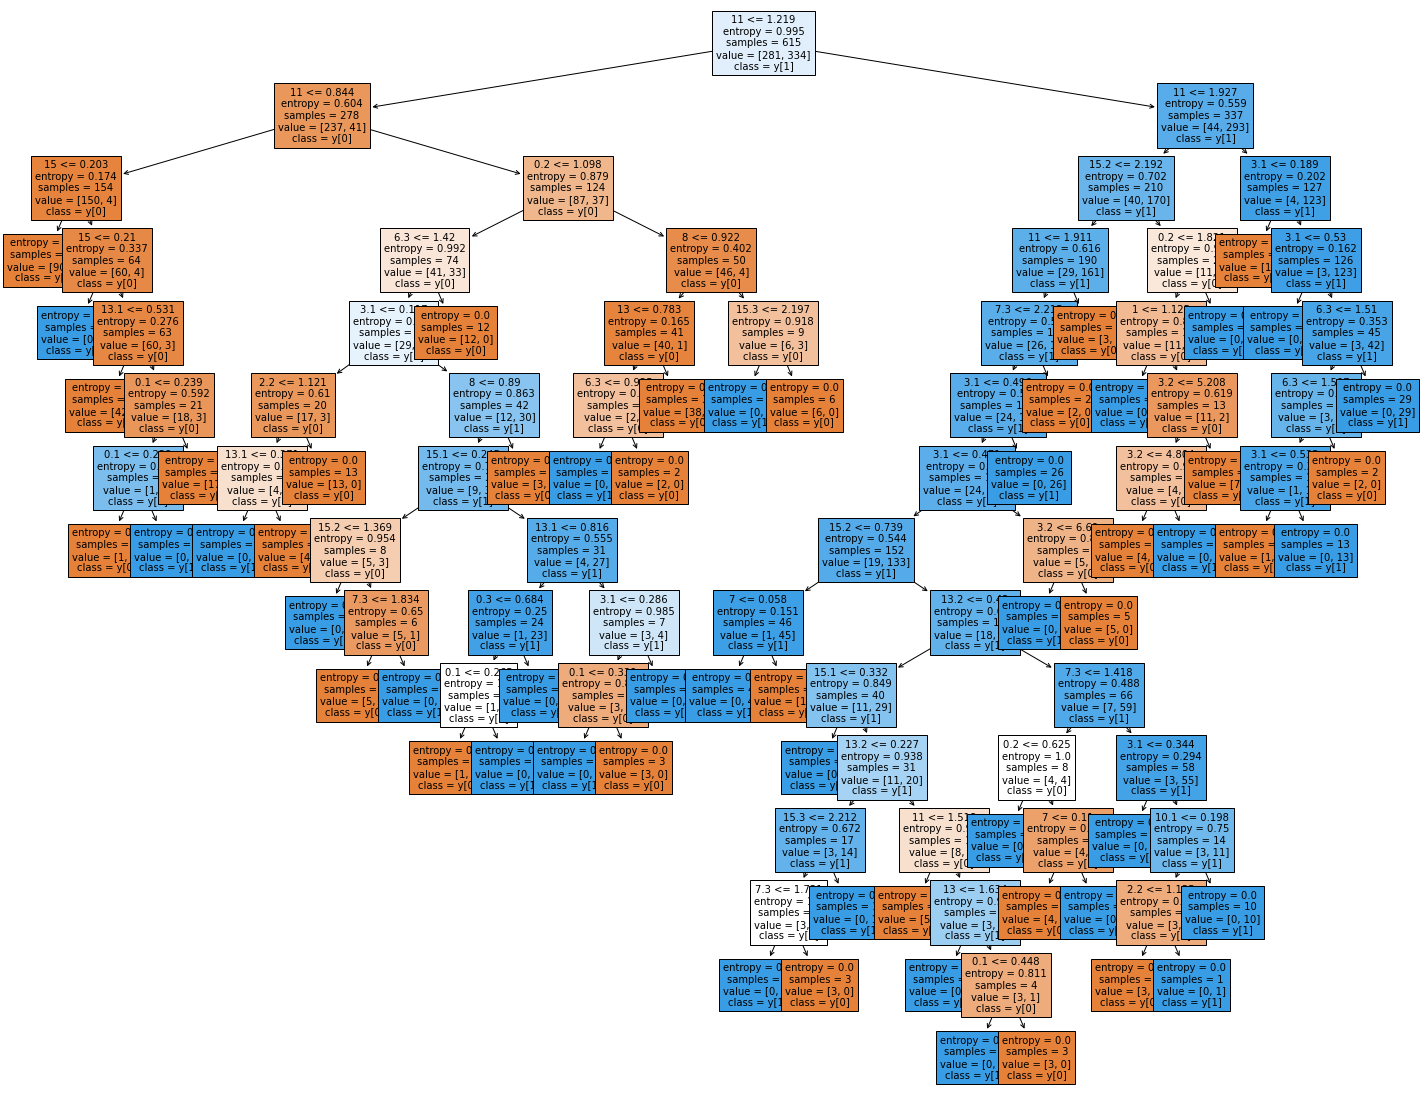

In [22]:
# decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, Y_train_binary)
Y_predictions = clf.predict(X_test)
cm = confusion_matrix(Y_predictions, Y_test_binary)
print("Confusion Matrix is:")
print(cm)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
print("Accuracy is : " + str(accuracy(cm)))
    
print("Report")
print(classification_report(Y_test_binary, Y_predictions))
    
#Visualization of the tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True, fontsize=10, max_depth= None,feature_names = list(X_train.columns), class_names = True)
plt.show()

In [23]:
# save clf model
from joblib import dump, load
dump(clf, '../Models/Meta_only/CNNMeta_dt.joblib')

['../Models/Meta_only/CNNMeta_dt.joblib']

In [24]:
# function for Decision tree, and random forest testing
def Test_DT(path_train,path_test,model_name):
    Train = pd.read_csv(path_train)
    Test = pd.read_csv(path_test)
    
    X_train = Train.iloc[:,:-1]
    Y_train = Train.iloc[:,-1]

    X_test = Test.iloc[:,:-1]
    Y_test = Test.iloc[:,-1]

    #binarize the target
    Y_train_binary = Y_train.apply(lambda x: 1 if x > 0 else 0)
    Y_test_binary = Y_test.apply(lambda x: 1 if x > 0 else 0)

    model = load(model_name)

    Y_pred = model.predict(X_test)
    
    cm = confusion_matrix(Y_pred, Y_test_binary)
    print(cm)
    print(classification_report(Y_test_binary, Y_pred, digits=4))
    
    mismatch = [i for i, (a,b) in enumerate(zip(Y_pred, Y_test_binary)) if a != b]
    print(mismatch)

In [25]:
#test on each dataset for decision tree
print("Cle test")
path_train = 'cle_metadata_cnn_train.csv'
path_test = 'cle_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_dt.joblib'
Test_DT(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_cnn_train.csv'
path_test = 'vir_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_dt.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_cnn_train.csv'
path_test = 'hun_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_dt.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_cnn_train.csv'
path_test = 'swi_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_dt.joblib'
Test_DT(path_train,path_test,model)

Cle test
[[41 11]
 [11 37]]
              precision    recall  f1-score   support

           0     0.7885    0.7885    0.7885        52
           1     0.7708    0.7708    0.7708        48

    accuracy                         0.7800       100
   macro avg     0.7796    0.7796    0.7796       100
weighted avg     0.7800    0.7800    0.7800       100

[0, 9, 16, 18, 19, 26, 28, 36, 46, 48, 53, 56, 63, 73, 74, 75, 77, 81, 85, 86, 93, 96]
vir test
[[ 7  8]
 [ 8 43]]
              precision    recall  f1-score   support

           0     0.4667    0.4667    0.4667        15
           1     0.8431    0.8431    0.8431        51

    accuracy                         0.7576        66
   macro avg     0.6549    0.6549    0.6549        66
weighted avg     0.7576    0.7576    0.7576        66

[6, 7, 8, 9, 10, 20, 23, 26, 30, 34, 41, 46, 47, 48, 52, 59]
hun test
[[49  8]
 [11 30]]
              precision    recall  f1-score   support

           0     0.8596    0.8167    0.8376        60
     

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, Y_train_binary)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred))

[[ 99  14]
 [ 31 161]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       130
           1       0.84      0.92      0.88       175

    accuracy                           0.85       305
   macro avg       0.86      0.84      0.85       305
weighted avg       0.85      0.85      0.85       305



In [28]:
dump(classifier, '../Models/Meta_only/CNNMeta_rf.joblib')

['../Models/Meta_only/CNNMeta_rf.joblib']

In [29]:
#test on each dataset for Random Forest
print("Cle test")
path_train = 'cle_metadata_cnn_train.csv'
path_test = 'cle_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_rf.joblib'
Test_DT(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_cnn_train.csv'
path_test = 'vir_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_rf.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_cnn_train.csv'
path_test = 'hun_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_rf.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_cnn_train.csv'
path_test = 'swi_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_rf.joblib'
Test_DT(path_train,path_test,model)

Cle test
[[42  5]
 [10 43]]
              precision    recall  f1-score   support

           0     0.8936    0.8077    0.8485        52
           1     0.8113    0.8958    0.8515        48

    accuracy                         0.8500       100
   macro avg     0.8525    0.8518    0.8500       100
weighted avg     0.8541    0.8500    0.8499       100

[9, 18, 19, 22, 27, 28, 46, 53, 63, 73, 74, 77, 81, 86, 96]
vir test
[[ 6  4]
 [ 9 47]]
              precision    recall  f1-score   support

           0     0.6000    0.4000    0.4800        15
           1     0.8393    0.9216    0.8785        51

    accuracy                         0.8030        66
   macro avg     0.7196    0.6608    0.6793        66
weighted avg     0.7849    0.8030    0.7879        66

[4, 6, 7, 8, 10, 19, 20, 23, 26, 28, 35, 48, 57]
hun test
[[50  3]
 [10 35]]
              precision    recall  f1-score   support

           0     0.9434    0.8333    0.8850        60
           1     0.7778    0.9211    0.8434 

# SVM

In [30]:
from sklearn.svm import SVC

In [31]:
svc = SVC()
svc.fit(X_train, Y_train_binary.values.ravel())
y_pred = svc.predict(X_test)
print(confusion_matrix(Y_test_binary, y_pred))
print(classification_report(Y_test_binary, y_pred))

[[ 96  34]
 [ 13 162]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       130
           1       0.83      0.93      0.87       175

    accuracy                           0.85       305
   macro avg       0.85      0.83      0.84       305
weighted avg       0.85      0.85      0.84       305



In [32]:
import joblib
joblib.dump(svc, "../Models/Meta_only/CNNMeta_svm.pkl") 

['../Models/Meta_only/CNNMeta_svm.pkl']

In [33]:
#test on each dataset for SVM
print("Cle test")
path_train = 'cle_metadata_cnn_train.csv'
path_test = 'cle_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_svm.pkl'
Test_DT(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_cnn_train.csv'
path_test = 'vir_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_svm.pkl'
Test_DT(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_cnn_train.csv'
path_test = 'hun_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_svm.pkl'
Test_DT(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_cnn_train.csv'
path_test = 'swi_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_svm.pkl'
Test_DT(path_train,path_test,model)

Cle test
[[41  5]
 [11 43]]
              precision    recall  f1-score   support

           0     0.8913    0.7885    0.8367        52
           1     0.7963    0.8958    0.8431        48

    accuracy                         0.8400       100
   macro avg     0.8438    0.8421    0.8399       100
weighted avg     0.8457    0.8400    0.8398       100

[9, 19, 22, 27, 28, 46, 53, 62, 63, 73, 74, 77, 81, 85, 86, 96]
vir test
[[ 4  2]
 [11 49]]
              precision    recall  f1-score   support

           0     0.6667    0.2667    0.3810        15
           1     0.8167    0.9608    0.8829        51

    accuracy                         0.8030        66
   macro avg     0.7417    0.6137    0.6319        66
weighted avg     0.7826    0.8030    0.7688        66

[4, 6, 7, 8, 10, 19, 20, 23, 26, 35, 48, 53, 58]
hun test
[[50  3]
 [10 35]]
              precision    recall  f1-score   support

           0     0.9434    0.8333    0.8850        60
           1     0.7778    0.9211    0.8

# Bayesian Classifier

In [34]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train_binary)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred))

dump(clf, '../Models/Meta_only/CNNMeta_NB.joblib')

[[107  23]
 [ 23 152]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       130
           1       0.87      0.87      0.87       175

    accuracy                           0.85       305
   macro avg       0.85      0.85      0.85       305
weighted avg       0.85      0.85      0.85       305



['../Models/Meta_only/CNNMeta_NB.joblib']

In [35]:
print("Cle test")
path_train = 'cle_metadata_cnn_train.csv'
path_test = 'cle_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_NB.joblib'
Test_DT(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_cnn_train.csv'
path_test = 'vir_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_NB.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_cnn_train.csv'
path_test = 'hun_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_NB.joblib'
Test_DT(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_cnn_train.csv'
path_test = 'swi_metadata_cnn_test.csv'
model = '../Models/Meta_only/CNNMeta_NB.joblib'
Test_DT(path_train,path_test,model)

Cle test
[[41 11]
 [11 37]]
              precision    recall  f1-score   support

           0     0.7885    0.7885    0.7885        52
           1     0.7708    0.7708    0.7708        48

    accuracy                         0.7800       100
   macro avg     0.7796    0.7796    0.7796       100
weighted avg     0.7800    0.7800    0.7800       100

[0, 9, 16, 18, 19, 26, 28, 36, 46, 48, 53, 56, 63, 73, 74, 75, 77, 81, 85, 86, 93, 96]
vir test
[[ 7  8]
 [ 8 43]]
              precision    recall  f1-score   support

           0     0.4667    0.4667    0.4667        15
           1     0.8431    0.8431    0.8431        51

    accuracy                         0.7576        66
   macro avg     0.6549    0.6549    0.6549        66
weighted avg     0.7576    0.7576    0.7576        66

[6, 7, 8, 9, 10, 20, 23, 26, 30, 34, 41, 46, 47, 48, 52, 59]
hun test
[[49  8]
 [11 30]]
              precision    recall  f1-score   support

           0     0.8596    0.8167    0.8376        60
     